## Corona Tracker
    install git mkae a git folder go there then:
    type this into a folder (unix) git pull https://github.com/CSSEGISandData/COVID-19.git
    or just download the data.
    
    This data is currently plotted here: https://coronavirus.jhu.edu/map.html

In [1]:
import sys, os, copy, pprint, glob
import datetime
import csv,random

#Make sure these libraries are installed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

In [ ]:
#Build all locations List Curate to make loc_lst_mapTo.csv

locLst=[]
c_ud='../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
for inp in glob.glob(c_ud+'*.csv'):
    fn=os.path.basename(inp)
    cor_data= pd.read_csv(inp)
    try:
        locLst.extend(cor_data[['Country/Region', 'Province/State', 'Latitude', 'Longitude']].values.tolist())
    except:
        locLst.extend(cor_data[['Country/Region', 'Province/State']].values.tolist())
    
loclst_df=pd.DataFrame(locLst, columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude'])
loclst_df.drop_duplicates(keep='first',inplace=True) 
loclst_df.to_csv('data/loc_lst.csv')

In [20]:
p = subprocess.Popen(['git', 'pull'], cwd='../COVID-19/')
p.wait()

c_ud='../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
country='US';population_M=300
#country='Italy';population_M=65
#country='Romania';population_M=20
#country='Iceland';population_M=0.330

mapto_df=pd.read_csv('data/loc_lst_mapTo.csv')
mapto_df.fillna(0, inplace=True)
d={}
locLst=[]
fileLst = list(glob.glob(c_ud+'*.csv'))
fileLst.sort()

previous_date=''
for inp in fileLst:
    fn=os.path.basename(inp)
    file_date=fn.split('.')[0]
    cor_data= pd.read_csv(inp)
    cor_data.fillna(0, inplace=True)
    try:
        us_df=cor_data[cor_data['Country/Region']==country]
    except:
        us_df=cor_data[cor_data['Country_Region']==country]
    d[file_date]={}
    total_cases=0
    for i, row in us_df.iterrows():
        try:
            country=row['Country/Region']
            pstate=row['Province/State']
            cr='Country/Region'
            ps='Province/State'
        except:
            country=row['Country_Region']
            pstate=row['Province_State']
            cr='Country_Region'
            ps='Province_State'
        try:
            location=mapto_df.loc[(mapto_df['Country/Region']==country) & (mapto_df['Province/State']==pstate)].values.tolist()[0][-3]
        except:
            print ('You need to update data/loc_lst_mapTo.csv  UNKNOWN:', country, pstate)
            location=country
        
        d[file_date][location]=row['Confirmed']
        total_cases+=row['Confirmed']
    if False and file_date>"03-21-2020":
        for key in d[file_date].keys():
            if key in d[previous_date]:
                d[file_date][key]+=d[previous_date][key]
    previous_date=file_date
    
dLst=list(d.keys())
dLst.sort()
df=pd.DataFrame(d, columns=dLst).fillna(0)
df['row_max']=df.max(axis=1)
df.loc['total_counts', :] = df.sum(axis=0)
df=df.sort_values(by=['row_max'],ascending=False)
df.to_csv('data/%s_latest.csv'%country)

df

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,...,03-29-2020,03-30-2020,03-31-2020,04-01-2020,04-02-2020,04-03-2020,04-04-2020,04-05-2020,04-06-2020,row_max
total_counts,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,6.0,...,1623.0,1926.0,2222.0,2686.0,2969.0,3381.0,3946.0,4312.0,4702.0,27879.0
NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,10.0,1.0,1.0,1.0,1.0,1.0,11710.0
WA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,140.0,147.0,161.0,161.0,224.0,240.0,289.0,326.0,363.0,1793.0
CA,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,4.0,6.0,7.0,8.0,8.0,9.0,9.0,11.0,1364.0
NJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,68.0,76.0,96.0,116.0,149.0,182.0,195.0,215.0,1327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
SAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


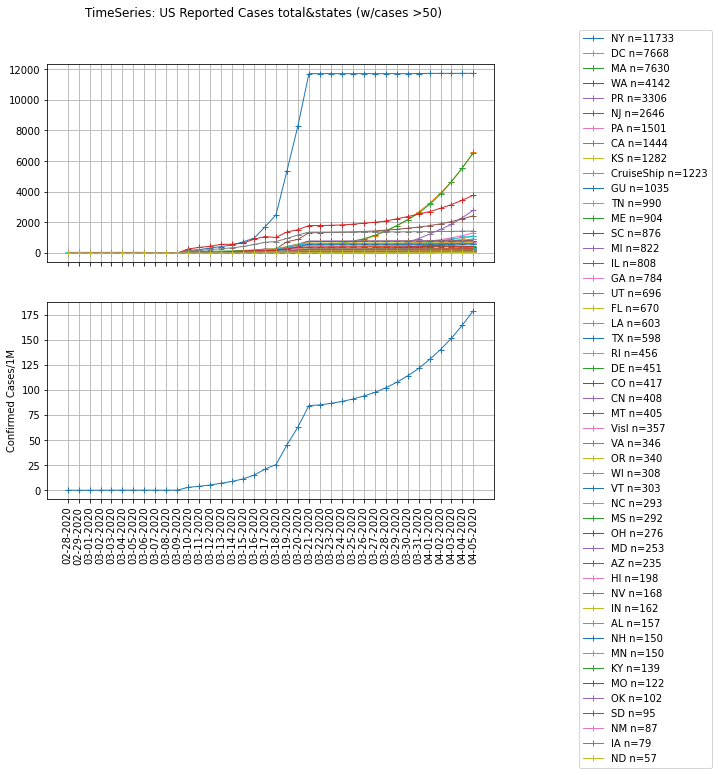

In [19]:
start_pnt=-40;end_point=-2;report_thresh=50

lineLst=df.index

fig, axs = plt.subplots(2, sharex=True,figsize=(8,8))
fig.suptitle('TimeSeries: US Reported Cases total&states (w/cases >%i)'%report_thresh)

for st in lineLst:
    if st=='total_counts': continue
    x=df.loc[st]
    st_sum=x.row_max
    if st_sum<report_thresh:continue
    axs[0].plot( df.columns[start_pnt:end_point], df.loc[st][start_pnt:end_point], marker='+', linewidth=1, label='%s n=%i'%(st, st_sum))
    axs[0].grid(True)
    plt.ylabel('Confirmed Cases')
    

axs[0].legend(loc='best', bbox_to_anchor=(1.0, 0.7, 0.5, 0.5))

st='total_counts'
axs[1].plot( df.columns[start_pnt:end_point], df.loc[st][start_pnt:end_point]/population_M, marker='+', linewidth=1, label='%s n=%i'%(st, st_sum))
plt.ylabel('Confirmed Cases/1M')
plt.xticks(rotation=90)
plt.grid(True)

In [ ]:
1376/6.5

In [ ]:
x=np.nan
if not(np.isnan(x)):
    print('YO')